<a href="https://colab.research.google.com/github/krristenng/hotlava_GIT/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: machine learning analysis of a superconductors' database


In this project you will greatly expand your familiarity with machine learning applications to scientific problems, by exploring a large dataset of superconducting materials, i.e. materials that conduct electricity without resistance.

The specific datasets of interest for this project, *train* and *unique_m* are available in CSV format in the Canvas module dedicated to this project. You can find the full code and documentation [here](https://github.com/khamidieh/predict_tc). This GitHub repository is the computational basis of the paper [A Data-Driven Statistical Model for Predicting the Critical Temperature of a Superconductor](https://arxiv.org/abs/1803.10260) by Kam Hamidieh. 


The dataset *unique_m* contains , for each row, the chemical formula of several superconducting materials, and the critical temperature at which they manifest superconducting properties. The chemical formula is broken up in a row of concentrations associated to each chemical element in the material.

The dataset *train* contains in each row a list of relevant chemical properties that can be calculated from first principles for the materials (and the critical temperature as well).

(1) Create training and testing datasets by generating two random subsets of the rows of the dataset *train* (excluding the critical temperature values). Create corresponding training and testing targets of critical temperatures.

Use the *regressors* of *scikit-learn* to generate machine learning predictors of the critical temperature. Evaluate the accuracy of your predictions.



 


N. B. the basic structure for this project is the same as the one for HW4 (outlined in HW4_Question1_template and HW4_Question2_template). Just remember that the work you did for HW4 was about *classifiers*, while here you will be working with *regressors*. The main difference is that your targets will take continuous values when you are building a regressor (as opposed to discrete, categorical values for classifiers). 

N. B. 2 after you import your csv data sets, and after you convert them in numpy arrays (that start with index 0!), change the critical temperature of row 20573 to 60. There is a typo in the dataset.

This is a [very basic tutorial](https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial) on (linear) regression with scikit-learn, and this is [a more complete tutorial](https://developer.ibm.com/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/) that lists several possible regressors in scikit-learn.  

In [57]:
#This is one project that is best done working on Colab.
# You will need the following two lines when reading files from your
# Google Drive
import numpy as np
import pandas as pd
import h5py
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_absolute_error as mae

drive.mount('/content/drive/')
#imports tools needed for code

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


These functions important programs and connects my google drive to this notebook. 

In [2]:

path="/content/drive/My Drive/project3/train.csv"
#accesses the train.csv file which is in my google drive. provides a way to be used in this file
df = pd.read_csv(path)
#makes it so that the file train.csv can be read
#csv file stands for comma separated value file which essentially a file that has a bunch of data separated by commas

Using pandas to read the csv(comma separated values) file more easily since it works better with data analysis. 

In [3]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

#critical point
y[20573]=60

criticalpoint = y[20573]
#print (criticalpoint)


<ipython-input-3-fcffa5eb68eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[20573]=60


The two functions above (x and y) are the two random subsets of the data set *train*. I've also set the critical temperature point to equal 60. 

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
#splits data into different functions

print(f"No. of training examples: {x_train.shape[0]}")
print(f"No. of testing examples: {x_test.shape[0]}")
print(f"No. of training examples: {y_train.shape[0]}")
print(f"No. of testing examples: {y_test.shape[0]}")

#makes sure the function works and prints out how many of each there is

No. of training examples: 15947
No. of testing examples: 5316
No. of training examples: 15947
No. of testing examples: 5316


The functions above splits the two random data sets in the last cell into two. One of the x's will become a train data set and another would be the test data set. Same thing goes for the y data set.  The test size will be 25% of the data


Mean absolute error: 13.37
Coefficient of determination: 0.73


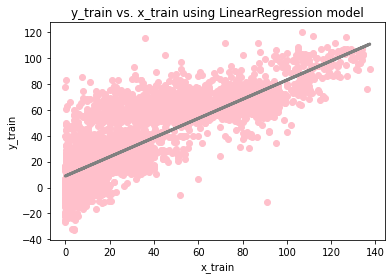

Mean absolute error: 6.22
Coefficient of determination: 0.87


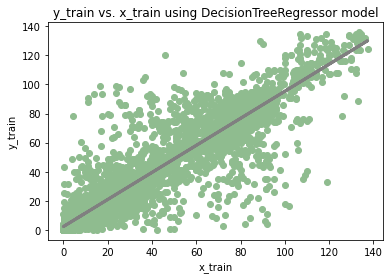

Mean absolute error: 5.22
Coefficient of determination: 0.92


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


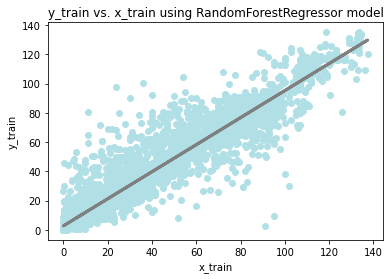

In [59]:
step=1

%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create linear regression object
lin = linear_model.LinearRegression()
# Train the model using the training sets
lin.fit(x_train,y_train)
# Make predictions using the testing set
l_pred = lin.predict(x_test)

# The mean squared error= measures how close a regression line is to a set of data points
print("Mean absolute error: %.2f" %mae(y_test, l_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" %r2_score(y_test, l_pred))
# The coefficients
#print("Coefficients: \n",lin.coef_)

#plot outputs
plt.scatter(y_test, l_pred, color="pink")
plt.title("y_train vs. x_train using LinearRegression model")
plt.xlabel("x_train")
plt.ylabel("y_train")
#regression line
n=np.polyfit(y_test,l_pred,1)
p=np.poly1d(n)
plt.plot(y_test, p(y_test),color="grey", linewidth=3)
plt.show()

tree=DecisionTreeRegressor()
plt.title("y_train vs. x_train using DecisionTreeRegressor model")
tree.fit(x_train,y_train)
t_pred = tree.predict(x_test)

# The mean squared error= measures how close a regression line is to a set of data points
print("Mean absolute error: %.2f" %mae(y_test, t_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" %r2_score(y_test, t_pred))
# The coefficients
#print("Coefficients: \n",forest.coef_)


#plot outputs
plt.scatter(y_test, t_pred, color="darkseagreen")
plt.xlabel("x_train")
plt.ylabel("y_train")
#regression line
n=np.polyfit(y_test,t_pred,1)
p=np.poly1d(n)
plt.plot(y_test, p(y_test),color="grey", linewidth=3)
plt.show()

forest=RandomForestRegressor(n_estimators=10, oob_score=True, random_state=100)
plt.title("y_train vs. x_train using RandomForestRegressor model")
forest.fit(x_train,y_train)
f_pred = forest.predict(x_test)

# The mean squared error= measures how close a regression line is to a set of data points
print("Mean absolute error: %.2f" %mae(y_test, f_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" %r2_score(y_test, f_pred))
# The coefficients
#print("Coefficients: \n",forest.coef_)


#plot outputs
plt.scatter(y_test, f_pred, color="powderblue")
plt.xlabel("x_train")
plt.ylabel("y_train")
#regression line
n=np.polyfit(y_test,f_pred,1)
p=np.poly1d(n)
plt.plot(y_test, p(y_test),color="grey", linewidth=3)
plt.show()


Testing three different regressors( RandomForest, RandomTree and Linear), RandomForestRegressor performed best. The mean absolute error of the linear reggressor is 13.37 which is measure of errors between paired observations expressing the same phenomenon. The mean absolute error for RandomTree is 6.22 and for RandomForestRegressor it is 5.22. The perfect mean absolute error is 0, so the accuracy of RandomForestRegressor outperformed the linear and RandomTree regressor. 

The coefficient of determination, or R^2, is the measure of how well a statistical model preficts a model. The perfect model would have an R^2 value of 1, which means 100% of the points would fall within the regression line. The linear model has a R^2 value of 0.73 which means that 73% of the points would fall within the regression line. The RandomTree model has a R^2 value of 0.87 which means that 87% of the points would fall within the regression line. The RandomForest model has a R^2 value of 0.92 which means that 92% of the points would fall within the regression line. Once again, RandomForest outperformed the other two models. RandomForest did 19% better than the linear model.

(2) Repeat the steps in (1), but by substituting the *train* dataset with the dataset *unique_m*. 



In [6]:
uath="/content/drive/My Drive/project3/unique_m.csv"
#accesses the unique_m.csv file which is in my google drive. provides a way to be used in this file
cf = pd.read_csv(uath)
#makes it so that the file unique_m.csv can be read

In [7]:
x2 = cf.iloc[:,0:-2]
y2 = cf.iloc[:,-2]



x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.25, random_state=42)
#splits data into different functions
print(f"No. of training examples: {x_train2.shape[0]}")
print(f"No. of testing examples: {x_test2.shape[0]}")
print(f"No. of training examples: {y_train2.shape[0]}")
print(f"No. of testing examples: {y_test2.shape[0]}")

No. of training examples: 15947
No. of testing examples: 5316
No. of training examples: 15947
No. of testing examples: 5316


The two functions above (x2 and y2) are the two random subsets of the data set *train*. I've also set the critical temperature point to equal 60. The functions above splits the two random data sets in the last cell into two. One of the x2's will become a train data set and another would be the test data set. Same thing goes for the y2 data set. The test size will be 25% of the data.

Mean absolute error: 15.43
Coefficient of determination: 0.64


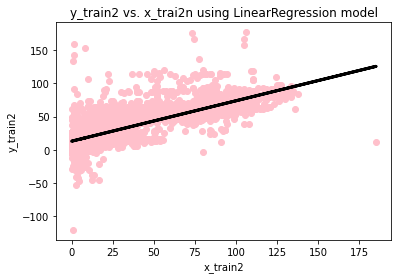

Mean absolute error: 5.74
Coefficient of determination: 0.89


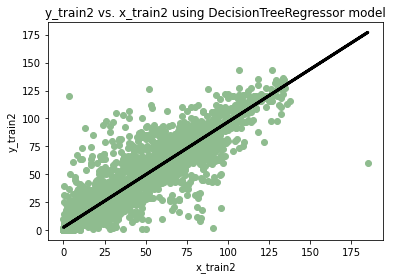

Mean absolute error: 5.28
Coefficient of determination: 0.92


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


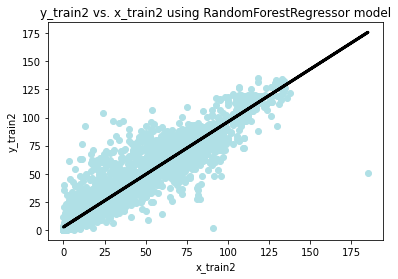

In [60]:

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x_train2, y_train2)
# Make predictions using the testing set
y_pred2 = regr.predict(x_test2)

# The mean squared error
print("Mean absolute error: %.2f" %mae(y_test2, y_pred2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" %r2_score(y_test2, y_pred2))
# The coefficients
#print("Coefficients: \n",regr.coef_)

#plot outputs
plt.scatter(y_test2, y_pred2, color="pink")
plt.title("y_train2 vs. x_trai2n using LinearRegression model")
plt.xlabel("x_train2")
plt.ylabel("y_train2")
#regression line
n=np.polyfit(y_test2,y_pred2,1)
p=np.poly1d(n)
plt.plot(y_test2, p(y_test2),color="black", linewidth=3)
plt.show()

trees=DecisionTreeRegressor()
plt.title("y_train2 vs. x_train2 using DecisionTreeRegressor model")
trees.fit(x_train2,y_train2)
tr_pred = trees.predict(x_test2)

# The mean squared error= measures how close a regression line is to a set of data points
print("Mean absolute error: %.2f" %mae(y_test2, tr_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" %r2_score(y_test2, tr_pred))
# The coefficients
#print("Coefficients: \n",forest.coef_)


#plot outputs
plt.scatter(y_test2, tr_pred, color="darkseagreen")
plt.xlabel("x_train2")
plt.ylabel("y_train2")
#regression line
n=np.polyfit(y_test2,tr_pred,1)
p=np.poly1d(n)
plt.plot(y_test2, p(y_test2),color="black", linewidth=3)
plt.show()

fors=RandomForestRegressor(n_estimators=10, oob_score=True, random_state=100)#DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
plt.title("y_train2 vs. x_train2 using RandomForestRegressor model")
fors.fit(x_train2,y_train2)
fs_pred = fors.predict(x_test2)

# The mean squared error= measures how close a regression line is to a set of data points
print("Mean absolute error: %.2f" %mae(y_test2, fs_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" %r2_score(y_test2, fs_pred))


#plot outputs
plt.scatter(y_test2, fs_pred, color="powderblue")
plt.xlabel("x_train2")
plt.ylabel("y_train2")
#regression line
n=np.polyfit(y_test2,fs_pred,1)
p=np.poly1d(n)
plt.plot(y_test2, p(y_test2),color="black", linewidth=3)
plt.show()


Testing three different regressors( RandomForest, RandomTree and Linear), RandomForestRegressor performed best. The mean absolute error of the linear reggressor is 15.43 which is measure of errors between paired observations expressing the same phenomenon. The mean absolute error for RandomTree is 5.74 and for RandomForestRegressor it is 5.28. The perfect mean absolute error is 0, so the accuracy of RandomForestRegressor outperformed the linear and RandomTree regressor. 

The coefficient of determination, or R^2, is the measure of how well a statistical model preficts a model. The perfect model would have an R^2 value of 1, which means 100% of the points would fall within the regression line. The linear model has a R^2 value of 0.65 which means that 65% of the points would fall within the regression line. The RandomTree model has a R^2 value of 0.9 which means that 90% of the points would fall within the regression line. The RandomForest model has a R^2 value of 0.92 which means that 92% of the points would fall within the regression line. Once again, RandomForest outperformed the other two models. RandomForest did better by 27% than the linear model. 



(3) Compare the accuracy of the results you get in (1) and (2) and comment on your results.



Ultimately, the data from the train data set out-performed the unique data set for the linear and RandomFOrest model except when it came to the coefficient of determination(R^2) of RandomForestRegressor and in that regard they tied. Just looking at the graph, you can tell that the train data set would have more accurate results as there is this one extreme outlier on the unique data set that completely messes up the data. 

For the linear regression model, the mean absolute error was about 2 units higher on the graph using unique data set than the one using the train data set. For the Coefficient of determination, it was lowed by by 8% when the unique data set was used.

For the RandomForest regressor, the mean absolute error was about .06 units higher on the graph using the unique data set than the train data set, but as said earlier, the R^2 was the same for both.


The results for RandomTree were actually the oposite of what happened for the other two models. RandomTree performed better using the unique data set. The Coefficient of determination is about 3% higher and the mean absolute error was lower by about .5 units.


(4) Repeat the analysis in (1)-(3), but replacing the regressors from *scikit-learn* with the corresponding deep learning neural network regressors that you can build with the Keras and TensorFlow Python packages. Refer to [this Jupyter notebook tutorial](https://www.tensorflow.org/tutorials/keras/regression) to learn how to build regressors in Keras.



In [9]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.2


Using Keras(a Python interface for artificial neural networks), we will use other models to see if the accuracy results of the data are better than that of RandomForest.

In [11]:
#first step of normalization
normalizer = tf.keras.layers.Normalization(axis=-1)
#fits the state of the preprocessing layer
normalizer.adapt(np.array(x_train))
#Calculate the mean and variance, and store them in the layer:
print(normalizer.mean.numpy())


[[10634.826     4.116    87.576    73.057    71.254    58.581     1.166
      1.065   115.82     33.264    44.478    41.513   769.463   869.565
    737.415   832.        1.3       0.929   571.345   481.923   215.281
    223.646   157.932   134.874   144.428   121.176     1.268     1.132
    139.244    51.409    51.559    52.297  6112.629  5273.925  3459.491
   3122.265     1.073     0.858  8673.009  2913.878  3419.55   3322.301
     76.774    92.436    54.218    72.033     1.071     0.772   120.736
     59.143    48.94     44.507    14.27     13.821    10.142    10.136
      1.094     0.916    21.085     8.182     8.296     7.704    89.631
     81.39     29.73     27.159     0.729     0.543   250.961    61.829
     98.954    96.161     3.199     3.155     3.058     3.057     1.296
      1.055     2.043     1.483     0.84      0.676]]


data shows a layer of normalized data for the mean variance which is just a set of data points for the mean that have been set to a similar scale in which the data shifts and is scaled with the distribution around zero and a standard deviation of one. 

In [12]:
first = np.array(x_train[:1])
second = np.array(y_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())
  print('Second example:', second)
  print()
  print('Normalized:', normalizer(second).numpy())

First example: [[  618.       6.     103.9     89.8     73.26    69.36     1.51     1.49
    192.98    36.2     76.82    65.3    769.1    724.4    736.14   701.47
      1.74     1.66   764.1    200.05   253.16   208.96   150.5    159.07
    136.65   148.87     1.72     1.56   171.      38.87    53.52    47.29
   5710.24  5642.4   1339.97  2176.5      1.41     1.27 11338.57  2693.14
   4438.54  3956.64    67.02    70.01    33.7     32.68     1.4      1.2
    138.63    35.27    54.35    54.98     7.59     9.29     4.67     6.87
      1.58     1.38    12.88     3.92     4.18     3.74   113.     169.3
     16.59    38.97     1.03     0.78   399.97   120.23   144.85   166.4
      2.83     2.61     2.62     2.42     1.71     1.62     3.       0.77
      1.21     1.18]]

Normalized: [[-1.63  1.31  0.55  0.5   0.06  0.29  0.95  1.06  1.41  0.11  1.61  1.19
  -0.   -1.01 -0.02 -1.09  1.16  2.19  0.62 -1.26  0.34 -0.11 -0.37  0.84
  -0.35  0.77  1.2   1.05  0.47 -0.36  0.09 -0.2  -0.14  0.11 -0.

Two examples of normalizing layers. In the first example, the data is taken from x_train and the second example the data is taken from y_train. 

In [13]:
#new np.array is made and is normalized through keras
xx = np.array(x_train)
xx_normalizer = layers.Normalization(input_shape=[1,], axis=None)
xx_normalizer.adapt(xx)

In [14]:
#keras seqential model

xx_model = tf.keras.Sequential([
    xx_normalizer,
    layers.Dense(units=1)
])

xx_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This is the keras seqential model working which bascially compiles a stack of layers where it only has one tensor input and one tensor output.

tensor input= essentially an input data container. np.array is one kind 

tensor output= essentially an output data container. np.array is one kind 

In [15]:

#compiles the most important arguments, loss and the optimizer
xx_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [16]:
#first step in a two step model and first layer is normalizer
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
#linear_model.predict(x_train[:10])


In [17]:
#prints out the matrices of the model
linear_model.layers[1].kernel


<tf.Variable 'dense_1/kernel:0' shape=(82, 1) dtype=float32, numpy=
array([[ 0.258],
       [-0.008],
       [-0.259],
       [-0.243],
       [ 0.235],
       [-0.08 ],
       [ 0.023],
       [ 0.036],
       [-0.04 ],
       [ 0.214],
       [-0.156],
       [-0.135],
       [ 0.004],
       [-0.152],
       [ 0.185],
       [ 0.102],
       [ 0.171],
       [-0.182],
       [-0.177],
       [-0.024],
       [ 0.077],
       [ 0.058],
       [ 0.217],
       [-0.096],
       [ 0.238],
       [ 0.108],
       [ 0.076],
       [-0.239],
       [-0.116],
       [-0.21 ],
       [-0.243],
       [ 0.153],
       [ 0.004],
       [ 0.15 ],
       [ 0.116],
       [ 0.214],
       [ 0.101],
       [-0.079],
       [-0.02 ],
       [ 0.055],
       [ 0.244],
       [-0.16 ],
       [-0.155],
       [-0.227],
       [ 0.239],
       [-0.008],
       [ 0.237],
       [-0.102],
       [-0.017],
       [-0.097],
       [ 0.121],
       [ 0.12 ],
       [-0.096],
       [-0.181],
       [ 0.053

The array of the linear model is displayed above.

In [18]:
#compiling a model specifies what layers the model contain, and how they're connected
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [46]:
#trains the data only for the first 100 data points
%%time
history = linear_model.fit(
    x_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 1min 10s, sys: 4.88 s, total: 1min 15s
Wall time: 1min 1s


a linear model is innitiated above to test the data set.

In [47]:
def plot_loss(tester):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

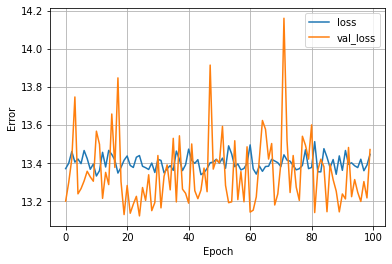

In [48]:
plot_loss(model)


This graph plots the first 100 data points using a linear regression to find the error. 


In [38]:
#collects the results from test set
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    x_test, y_test, verbose=0)

dnn

In [39]:
#Deep neural network
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


The function above compiles the normalization layer and adds more layers in order to give a model a bigger capacity which would give it the ability to learn complex tasks and achieve better performance.

In [40]:
#dnn with single input and summary

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 82)               165       
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 64)                5312      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,702
Trainable params: 9,537
Non-trainable params: 165
_________________________________________________________________


The above data essentially tells us how many of the parameters are trainable and nontrainable. The data is drawn from the linear and DNN models. There are four layers to this model.

In [41]:
#train keras using the function model.fit
%%time
model = dnn_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 1min 24s, sys: 5.81 s, total: 1min 30s
Wall time: 1min 22s


initiating the dnn model to test data.

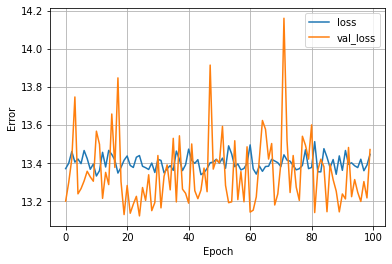

In [49]:
plot_loss(model)


The graph above shows the error of the first 100 data points using the deep neural network model. This graph has more layers than the linear model so it has more data to draw from to make this graph even. The loss line is much more stable and linear than the vol_loss

loss=to compute the quantity that a model should seek to minimize during training

val_loss= assess the performance of a deep learning model on the validation set(a sample of data held back from training your model that is used to give an estimate of model skill while tuning model's hyperparameters
)

In [50]:
#collects data from test set
test_results['dnn_model'] = dnn_model.evaluate(x_test, y_test, verbose=0)

print(test_results)

#reviews performance of both models
pd.DataFrame(test_results, index=['Mean absolute error']).T


{'linear_model': 13.513568878173828, 'dnn_model': 7.211411952972412}


,Mean absolute error
linear_model,13.513569
dnn_model,7.211412


167/167 [==============================] - 0s 1ms/step
Coefficient of determination: 0.87


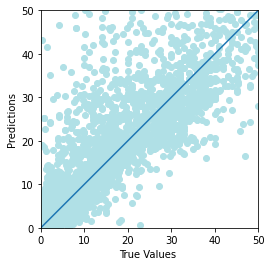

In [51]:
#make preduction with dnn model
test_predictions = dnn_model.predict(x_test).flatten()
#y_pred = model.predict(x_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test[0:-1], test_predictions[0:-1], color='powderblue')
plt.plot(color="black")
plt.xlabel('True Values ')
plt.ylabel('Predictions')
print("Coefficient of determination: %.2f" %r2_score(y_test, test_predictions))
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


Using the dnn model, we can predict what the model will look like and how accurate it is using the test set.

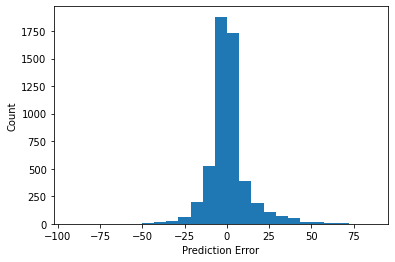

In [52]:
#error distribution
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

The graph above shows us how accurate the data is by estimating what the error is. Most of the data having an error prediction of 0 is a good sign that this model worked effectively.


In [53]:
dnn_model.save('dnn_model')


In [54]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    x_test, y_test, verbose=0)

In [55]:
pd.DataFrame(test_results, index=['Mean absolute error']).T


,Mean absolute error
linear_model,13.513569
dnn_model,7.211412
reloaded,7.211412


summary of results using keras.

The best model tested was the RandomForestRegressor with a mean absolute error of 5.22. I ultimately assumed the dnn model would perform the best as it was the most complex, but, that was not the case at all as it was outperformed by RandomForest as well as RandomTree regressor.

(5) Search the literature to find out what is the current state of machine learning approaches to the estimation of  superconductors' critical temperatures. Compare with your results for this project and suggest possible improvements to your code. 

https://pure.mpg.de/rest/items/item_2621552/component/file_2621551/content

Looking through multiple sources, this is one of the articles that summed up the results I ultimately found. Currently the research is slow and not very accurate. They are currently using regressors as well as using Magpie, a deep learning tool for multi-label text classification, to test the accuracy of the predictions. The most accurate application used is the RandomForestRegressor which gives an accuracy of .92 r^2(coefficient of determination).





https://www.sciencedirect.com/science/article/pii/S0921453420301374

Bagged Tree method is one of the regressors I found on the article above which takes a lot of the small Tree method Regressors and compiles them into one regressor which it shoud make it the best one. This could signifcantly improve the data

https://www.nature.com/articles/s41524-018-0085-8#Sec1

Another thing we can change to improve the results is to draw information from a bigger database, namely the SuperCon database which pulls from  >16,000 different compositions rather than a couple thousand compounds at most. 

Superconductors can and will probably how we are proplled into the future to reduce and hopefully eliminate the use of fossil fuels. Some things it can help run includes levitating trains, highly accurate magnetoencephalography(the measurement of the magnetic field generated by the electrical activity of neurons), and smaller and lighter engines, generators and transformers, faster connections


The example i think of is disneys monorail because the magnets keep it afloat, but it runs on ellectricity. The magnets are used to keep the train afloat.

I hope that the research for superconductors moves along quickly, but, at this rate I'm not sure how long it will take to find viable solution using this. Will countries all over the world be on board with this solution and help fund this. It will be expensive to implement.

I am constantly blown away by AI and its capabilities and I wonder where it will lead us going forward. The thing I question most is how logical it is to do all this research and find a solution. Will there be more regressors and tools used to better the results and how long that will take to model.   